# EDA (Exploratory Data Analysis)

[캐글 노트북 링크](https://www.kaggle.com/subinium/kakr-eda)

In [56]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [86]:
sns.set_style('whitegrid')

In [58]:
# 파일 출력
for dirname, _, filenames in os.walk('Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data/sample_submission.csv
Data/test.csv
Data/submission.csv
Data/train.csv


데이터 불러오기

In [59]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

## 데이터 탐색

In [60]:
train_data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [61]:
for col in train_data.columns:
    print(f"Type of {col} : {train_data[col].dtype}")

Type of id : int64
Type of age : int64
Type of workclass : object
Type of fnlwgt : int64
Type of education : object
Type of education_num : int64
Type of marital_status : object
Type of occupation : object
Type of relationship : object
Type of race : object
Type of sex : object
Type of capital_gain : int64
Type of capital_loss : int64
Type of hours_per_week : int64
Type of native_country : object
Type of income : object


수치형 정보 확인

In [68]:
train_data.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


범주형 정보 확인

In [70]:
train_data.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,26049,26049,26049,26049,26049,26049,26049,26049,26049
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,18123,8433,11970,3304,10541,22315,17482,23371,19744


In [67]:
train_data[['education','education_num']].value_counts()

education     education_num
HS-grad       9                8433
Some-college  10               5800
Bachelors     13               4344
Masters       14               1378
Assoc-voc     11               1096
11th          7                 922
Assoc-acdm    12                842
10th          6                 731
7th-8th       4                 505
Prof-school   15                466
9th           5                 418
12th          8                 359
Doctorate     16                316
5th-6th       3                 265
1st-4th       2                 134
Preschool     1                  40
dtype: int64

eductation_num은 단순히 education을 numbering 한 컬럼이므로 둘 중 하나만 쓰면 될 것 같다.

범주형 데이터 feature 확인

In [76]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        categories = train_data[col].unique()
        print(f'[{col}] ({len(categories)})')
        print(', '.join(categories))
        print()

[workclass] (9)
Private, State-gov, ?, Self-emp-not-inc, Local-gov, Federal-gov, Self-emp-inc, Without-pay, Never-worked

[education] (16)
HS-grad, 9th, Some-college, Bachelors, 11th, 1st-4th, 5th-6th, Assoc-acdm, 10th, Prof-school, 7th-8th, Masters, Assoc-voc, Doctorate, 12th, Preschool

[marital_status] (7)
Married-civ-spouse, Never-married, Separated, Married-spouse-absent, Divorced, Widowed, Married-AF-spouse

[occupation] (15)
Sales, Machine-op-inspct, Other-service, Prof-specialty, Adm-clerical, Craft-repair, ?, Handlers-cleaners, Farming-fishing, Exec-managerial, Transport-moving, Protective-serv, Tech-support, Priv-house-serv, Armed-Forces

[relationship] (6)
Husband, Own-child, Not-in-family, Unmarried, Wife, Other-relative

[race] (5)
White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo

[sex] (2)
Male, Female

[native_country] (41)
United-States, ?, Mexico, Poland, Philippines, Puerto-Rico, Vietnam, Germany, Cuba, France, Ireland, El-Salvador, Guatemala, Haiti, Trinad

## 데이터 분포 시각화

* 범주형 : bar
* 수치형
    * 이산형 : bar
    * 연속형 : kdeplot, histogram
* 범주형 + 수치형 : boxplot, violinplot, etc
* 수치형 + 수치형 : scatter

범주형 feature 별 갯수

In [78]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        categories = train_data[col].unique()
        print(f'[{col}] ({len(categories)})')

[workclass] (9)
[education] (16)
[marital_status] (7)
[occupation] (15)
[relationship] (6)
[race] (5)
[sex] (2)
[native_country] (41)
[income] (2)


feature별 갯수

In [79]:
train_data['sex'].value_counts()

Male      17482
Female     8567
Name: sex, dtype: int64

이를 seaborn으로 그려보자.

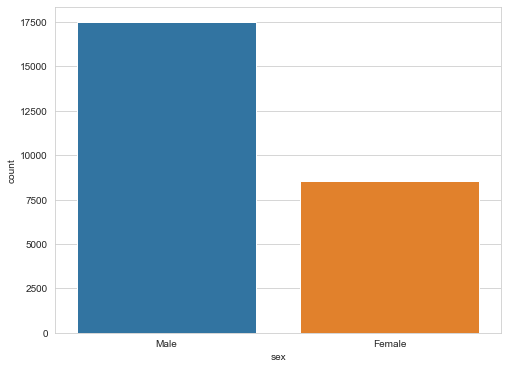

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='sex', data=train_data)
plt.show()

customizing은 다음과 같이 할 수 있다.

전

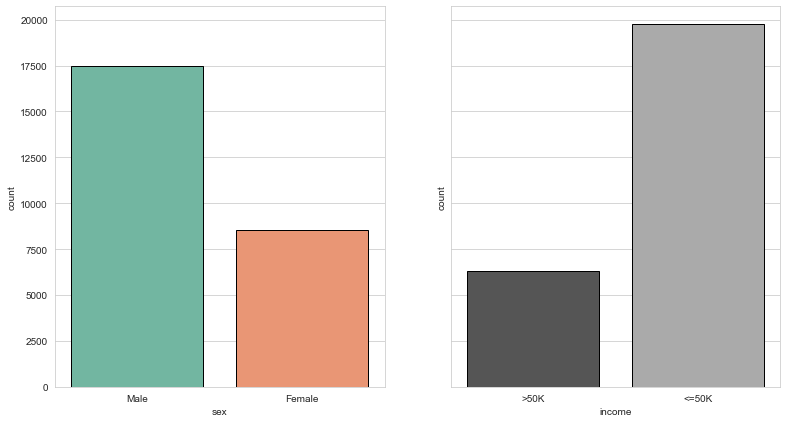

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(13,7), sharey=True)

sns.countplot(x='sex', data=train_data, ax=axes[0], palette="Set2", edgecolor='black')
sns.countplot(x='income', data=train_data, ax=axes[1], palette="gray", edgecolor='black')

plt.show()

후

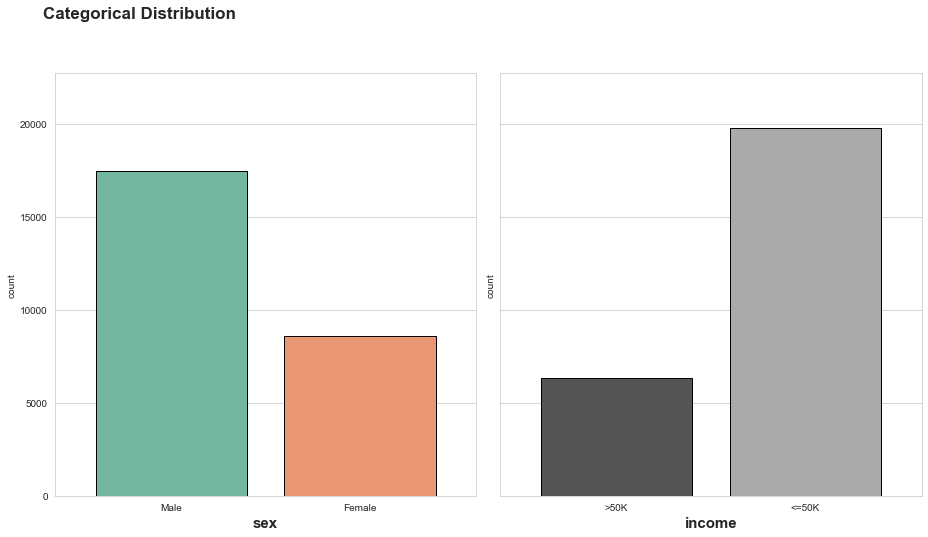

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(13,7), sharey=True)

sns.countplot(x='sex', data=train_data, ax=axes[0], palette="Set2", edgecolor='black')
sns.countplot(x='income', data=train_data, ax=axes[1], palette="gray", edgecolor='black')

# Margin & Label 조정
for ax in axes:
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(15)
    ax.xaxis.label.set_weight('bold')
    
# figure title
plt.suptitle('Categorical Distribution',
            fontsize=17,
            fontweight='bold',
            x=0.05, y=1.06,
            ha='left' # horizontal alignment
            )

plt.tight_layout() # 여백 줄임
plt.show()

인종과 국적도 한번 보자

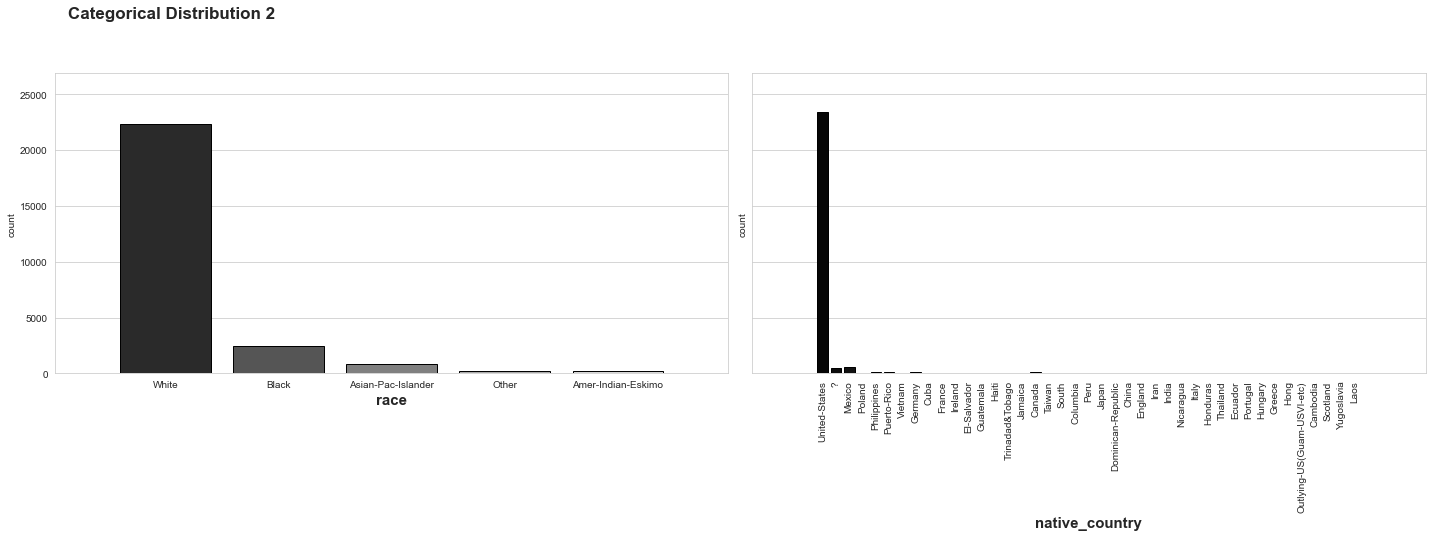

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), sharey=True)

sns.countplot(x='race', data=train_data, ax=axes[0], palette="gray", edgecolor='black')
sns.countplot(x='native_country', data=train_data, ax=axes[1], palette="gray", edgecolor='black')

# Margin & Label 조정
for ax in axes:
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(15)
    ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)    

# figure title
plt.suptitle('Categorical Distribution 2',
            fontsize=17,
            fontweight='bold',
            x=0.05, y=1.06,
            ha='left' # horizontal alignment
            )

plt.tight_layout() # 여백 줄임
plt.show()

관계와 결혼상태도 보자.

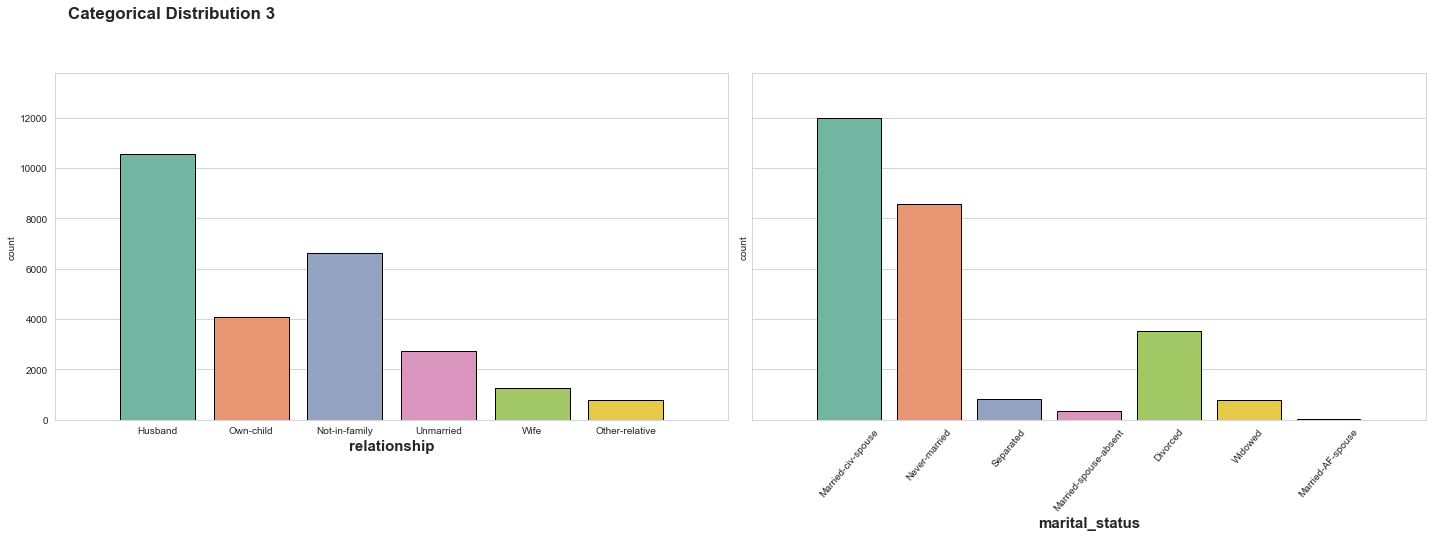

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), sharey=True)

sns.countplot(x='relationship', data=train_data, ax=axes[0], palette="Set2", edgecolor='black')
sns.countplot(x='marital_status', data=train_data, ax=axes[1], palette="Set2", edgecolor='black')

# Margin & Label 조정
for ax in axes:
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(15)
    ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=50)    

# figure title
plt.suptitle('Categorical Distribution 3',
            fontsize=17,
            fontweight='bold',
            x=0.05, y=1.06,
            ha='left' # horizontal alignment
            )

plt.tight_layout() # 여백 줄임
plt.show()

둘의 관계는 어떨까?

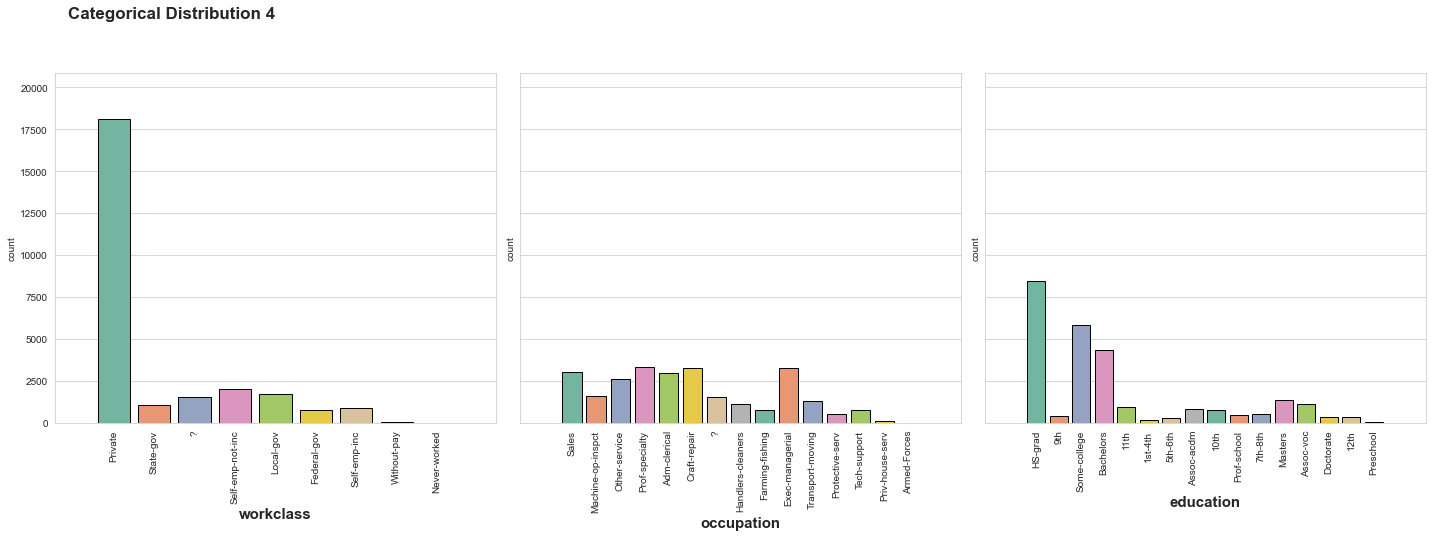

In [106]:
fig, axes = plt.subplots(1, 3, figsize=(20,7), sharey=True)

sns.countplot(x='workclass', data=train_data, ax=axes[0], palette="Set2", edgecolor='black')
sns.countplot(x='occupation', data=train_data, ax=axes[1], palette="Set2", edgecolor='black')
sns.countplot(x='education', data=train_data, ax=axes[2], palette="Set2", edgecolor='black')

# Margin & Label 조정
for idx, ax in enumerate(axes):
    ax.margins(0.12, 0.15)
    ax.xaxis.label.set_size(15)
    ax.xaxis.label.set_weight('bold')
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=90)

# figure title
plt.suptitle('Categorical Distribution 4',
            fontsize=17,
            fontweight='bold',
            x=0.05, y=1.06,
            ha='left' # horizontal alignment
            )

plt.tight_layout() # 여백 줄임
plt.show()

## 수치형 데이터의 시각화

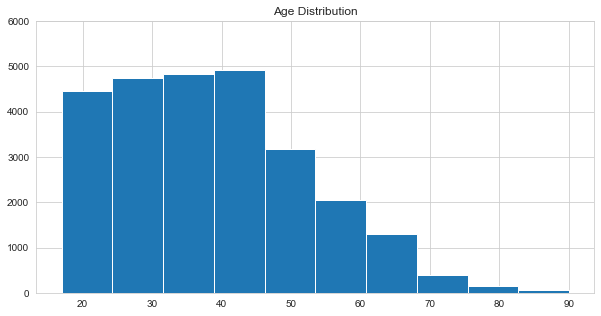

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.hist(train_data['age'], bins=10)
ax.set_ylim(0, 6000)
ax.set_title('Age Distribution')
plt.show()

# Given Baseline Model

In [16]:
import numpy as np 
import pandas as pd
from category_encoders.ordinal import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [20]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
sample_submission = pd.read_csv('Data/sample_submission.csv')

In [27]:
train.head(2)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
test.head(2)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [29]:
sample_submission.head(2)

,id,prediction
0,0,0
1,1,0


In [26]:
len(train), len(test), len(sample_submission)

(26049, 6512, 6512)

In [30]:
target = train['income'] != '<=50K'
train.drop(['income'], axis=1, inplace=True)

In [32]:
target.head(2)

0     True
1    False
Name: income, dtype: bool

In [33]:
train.head(2)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States


In [34]:
LE_encoder = OrdinalEncoder(list(train.columns))
train_le = LE_encoder.fit_transform(train, target)
test_le = LE_encoder.transform(test)

In [45]:
train_le.head(2)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,40,1,168538,1,9,1,1,1,1,1,0,0,60,1
1,1,17,1,101626,2,5,2,2,2,1,1,0,0,20,1


In [43]:
LE_encoder.category_mapping

[{'col': 'workclass',
  'mapping': Private             1
  State-gov           2
  ?                   3
  Self-emp-not-inc    4
  Local-gov           5
  Federal-gov         6
  Self-emp-inc        7
  Without-pay         8
  Never-worked        9
  NaN                -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'education',
  'mapping': HS-grad          1
  9th              2
  Some-college     3
  Bachelors        4
  11th             5
  1st-4th          6
  5th-6th          7
  Assoc-acdm       8
  10th             9
  Prof-school     10
  7th-8th         11
  Masters         12
  Assoc-voc       13
  Doctorate       14
  12th            15
  Preschool       16
  NaN             -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'marital_status',
  'mapping': Married-civ-spouse       1
  Never-married            2
  Separated                3
  Married-spouse-absent    4
  Divorced                 5
  Widowed                  6
  Married-AF-spouse        7
  NaN   

In [46]:
lr_clf = DecisionTreeClassifier()
lr_clf.fit(train_le, target)

DecisionTreeClassifier()

In [48]:
train_preds = lr_clf.predict(train_le)
train_preds

array([ True, False, False, ..., False, False, False])

In [62]:
sample_submission['prediction'] = lr_clf.predict(test_le).astype(int)
sample_submission.to_csv('Data/submission_basemodel.csv', index=False)

Basemodel 제출

In [63]:
!kaggle competitions submit -c kakr-4th-competition -f Data/submission_basemodel.csv -m 'Basemodel'

100%|██████████████████████████████████████| 43.4k/43.4k [00:04<00:00, 9.06kB/s]
Successfully submitted to [T-Academy X KaKr] 성인 인구조사 소득 예측 대회 